Prelab 04: Digital Pulse Modulation
=================================


### Exercise 4.1: 4-PAM Modulation and Demodulation

Source: Michael Rice, _Digital Communications: A Discrete-Time Approach_, Second Edition, 2020. Problem 5.31 (b) and (d).

Consider the 4-ary PAM symbol constellation

![4-ary PAM](./Images/prob_531.png)

with average energy 4.5 mJ.

#### Question 4.1a:

Assuming the NRZ pulse shape, sketch the transmitted waveform corresponding to the bit sequence: 1 0 0 1 0 1 1 0.

*ANSWER:*

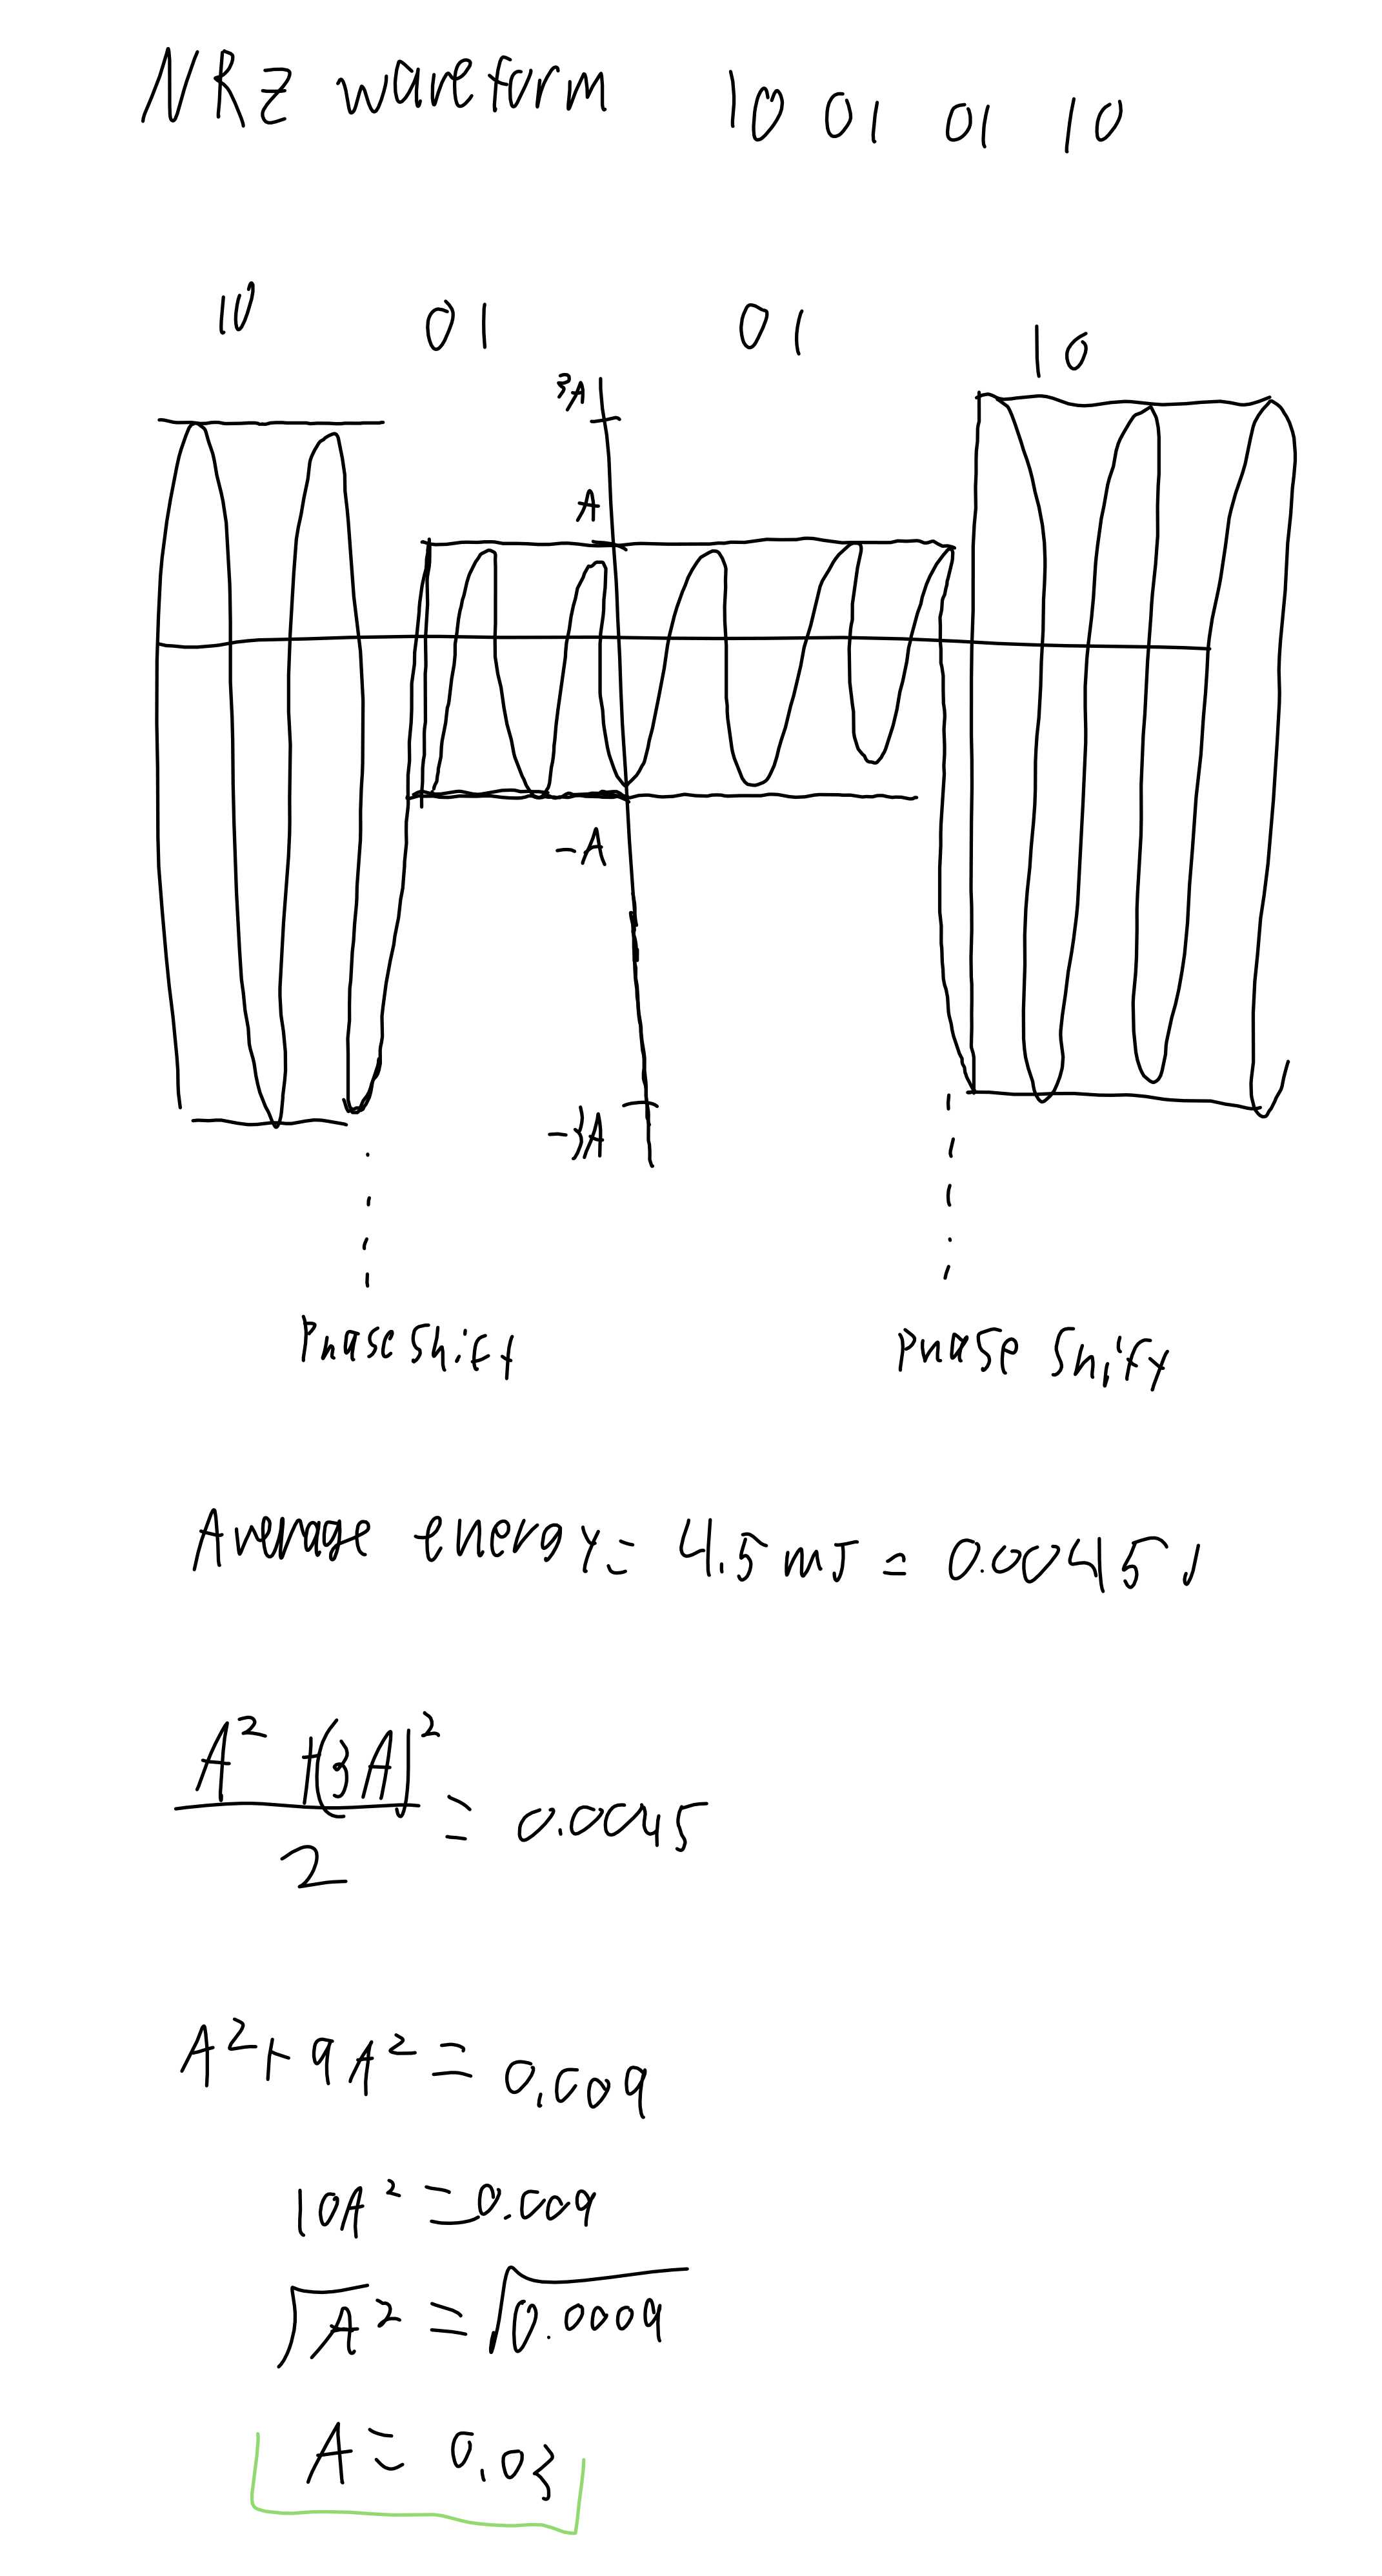

#### Question 4.1b:

Assuming minimum-distance decoding, determine the bit sequence for the match filter outputs: 0.071, 0.055, -0.032, -0.101.

*ANSWER:*

0.071 => 0.09

0.055 => 0.03

-0.032 => -0.03

-0.101 => -0.09



$\fbox{10 11 01 00}$

### Exercise 4.2: 16-QAM Modulation and Demodulation

Source: Michael Rice, _Digital Communications: A Discrete-Time Approach_, Second Edition, 2020. Problem 5.46 (b), (d), and (e).

Consider the square 16-QAM symbol constellation

![16-ary QAM](./Images/prob_546.png)

with average energy 0.9 J. 


#### Question 4.2a:

Assuming the NRZ pulse shape, sketch the transmitted waveform corresponding to the bit sequence: 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0.

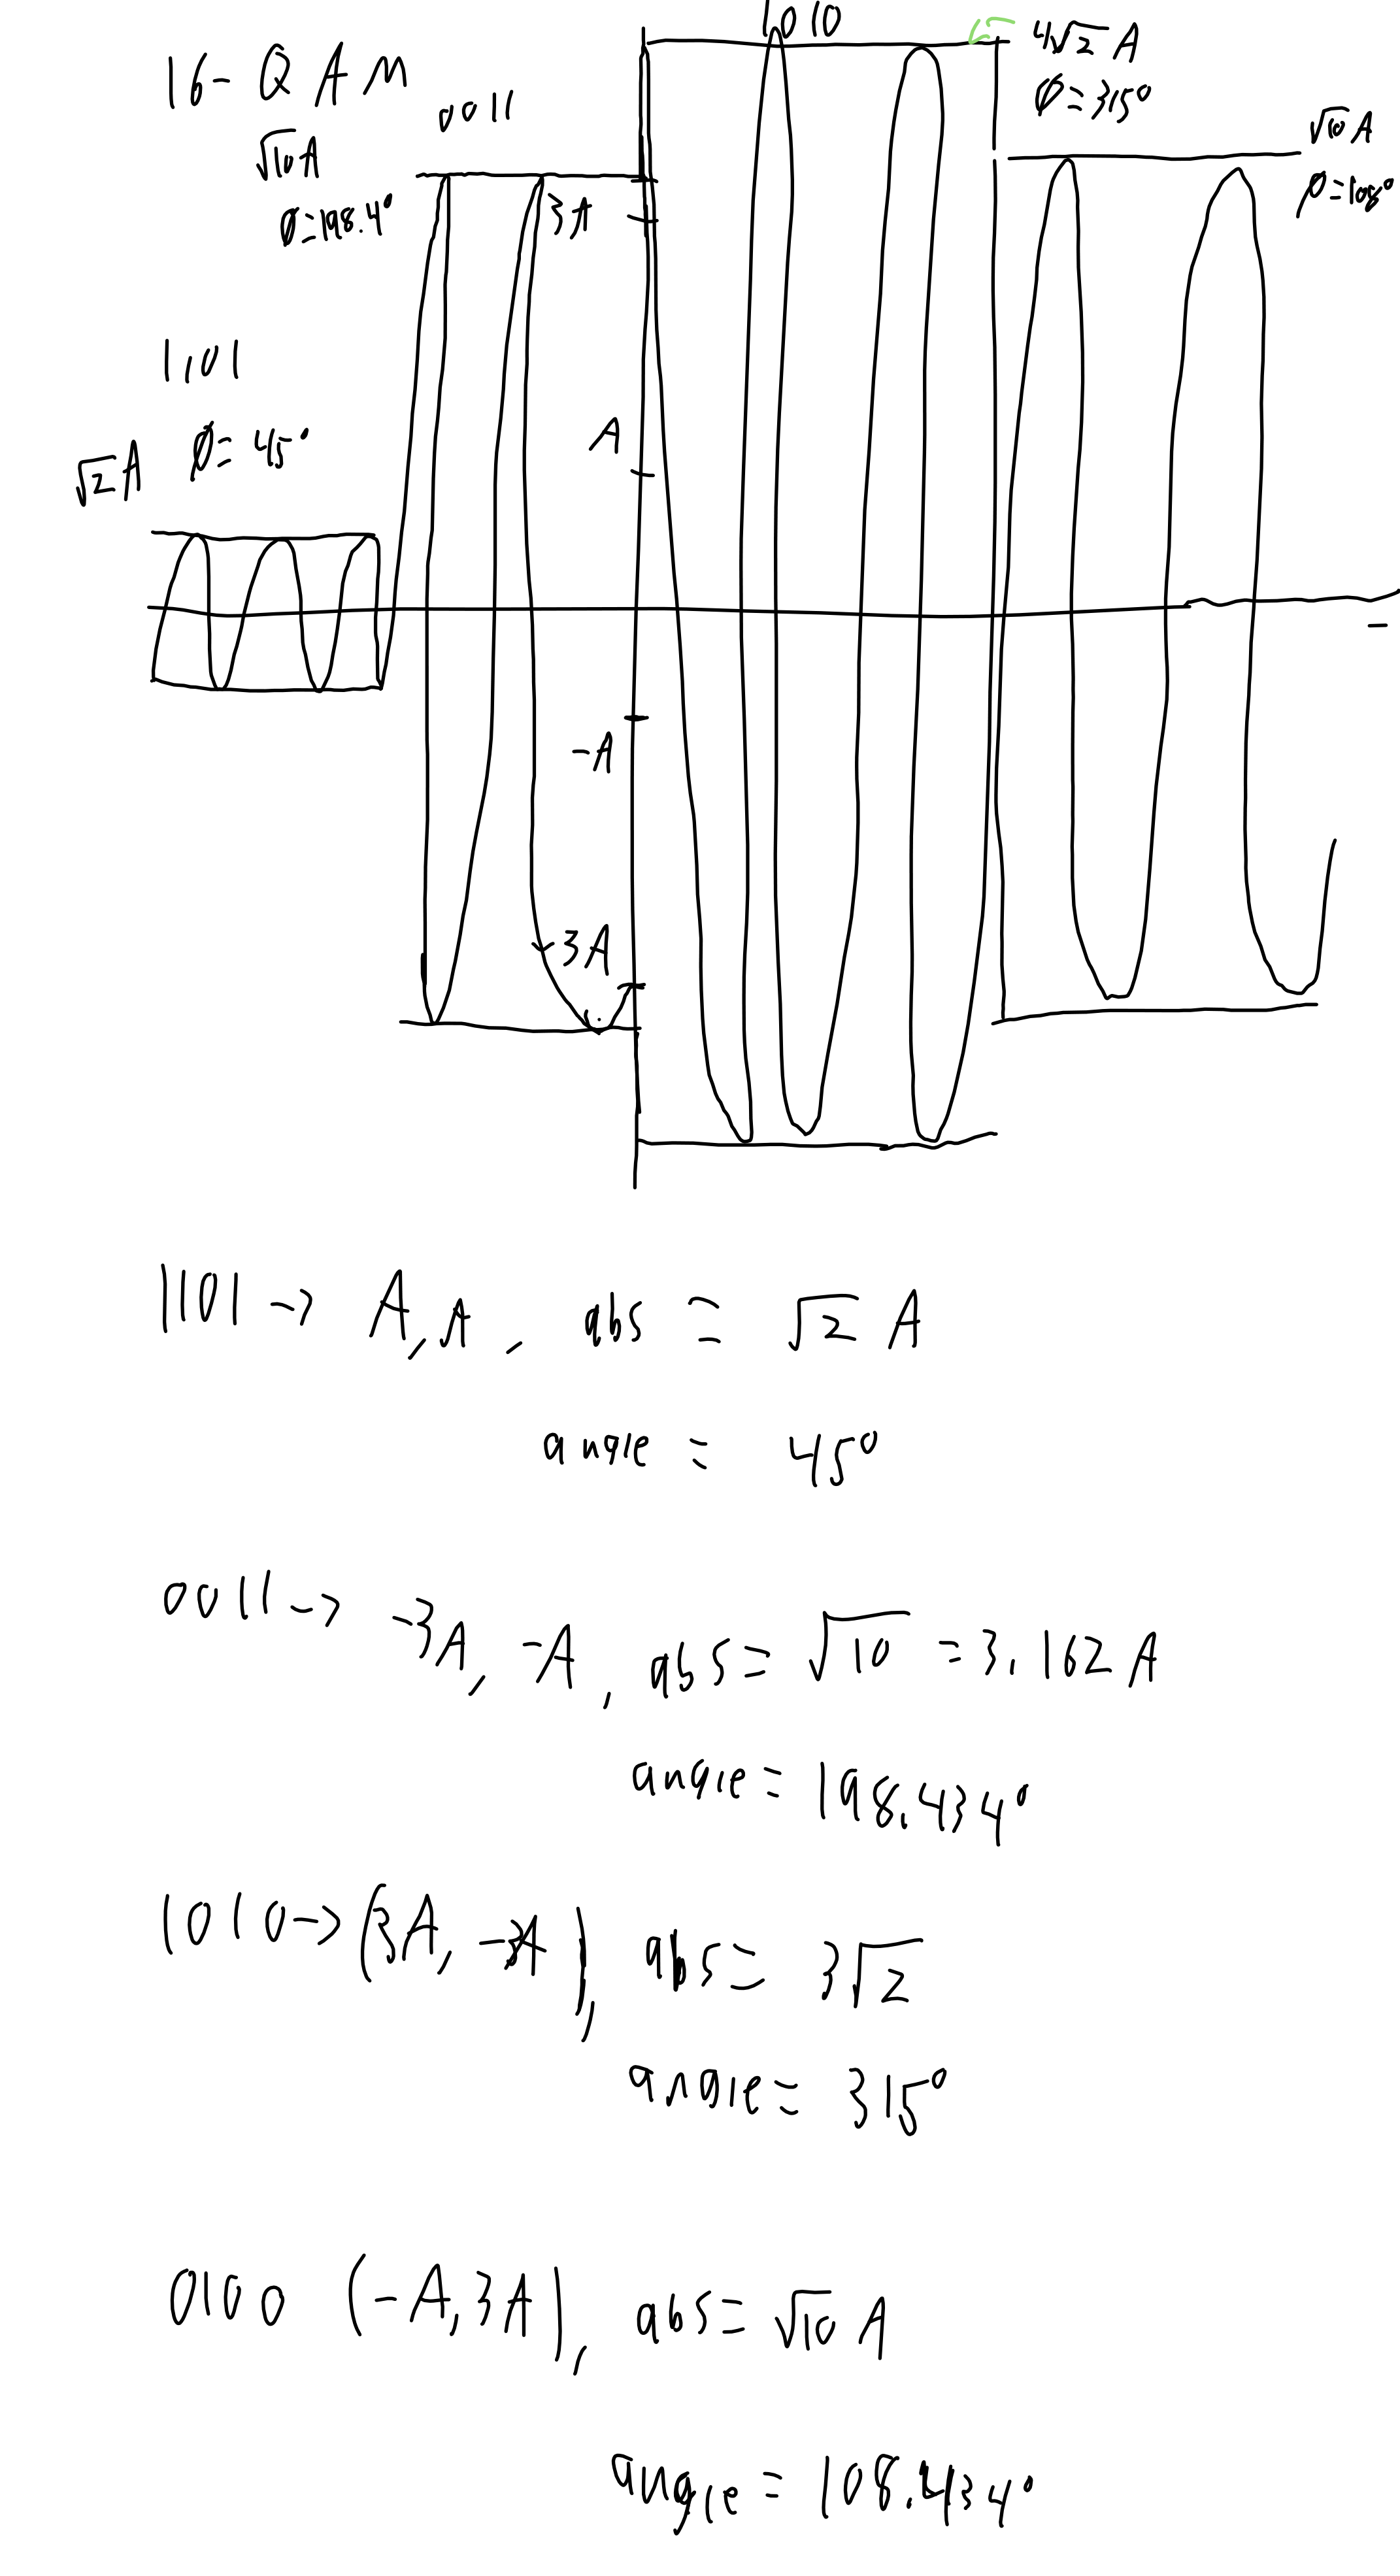*ANSWER:*



#### Question 4.2b:

Assuming minimum-distance decoding, sketch the decision regions for each point in the constellation.

*ANSWER:*

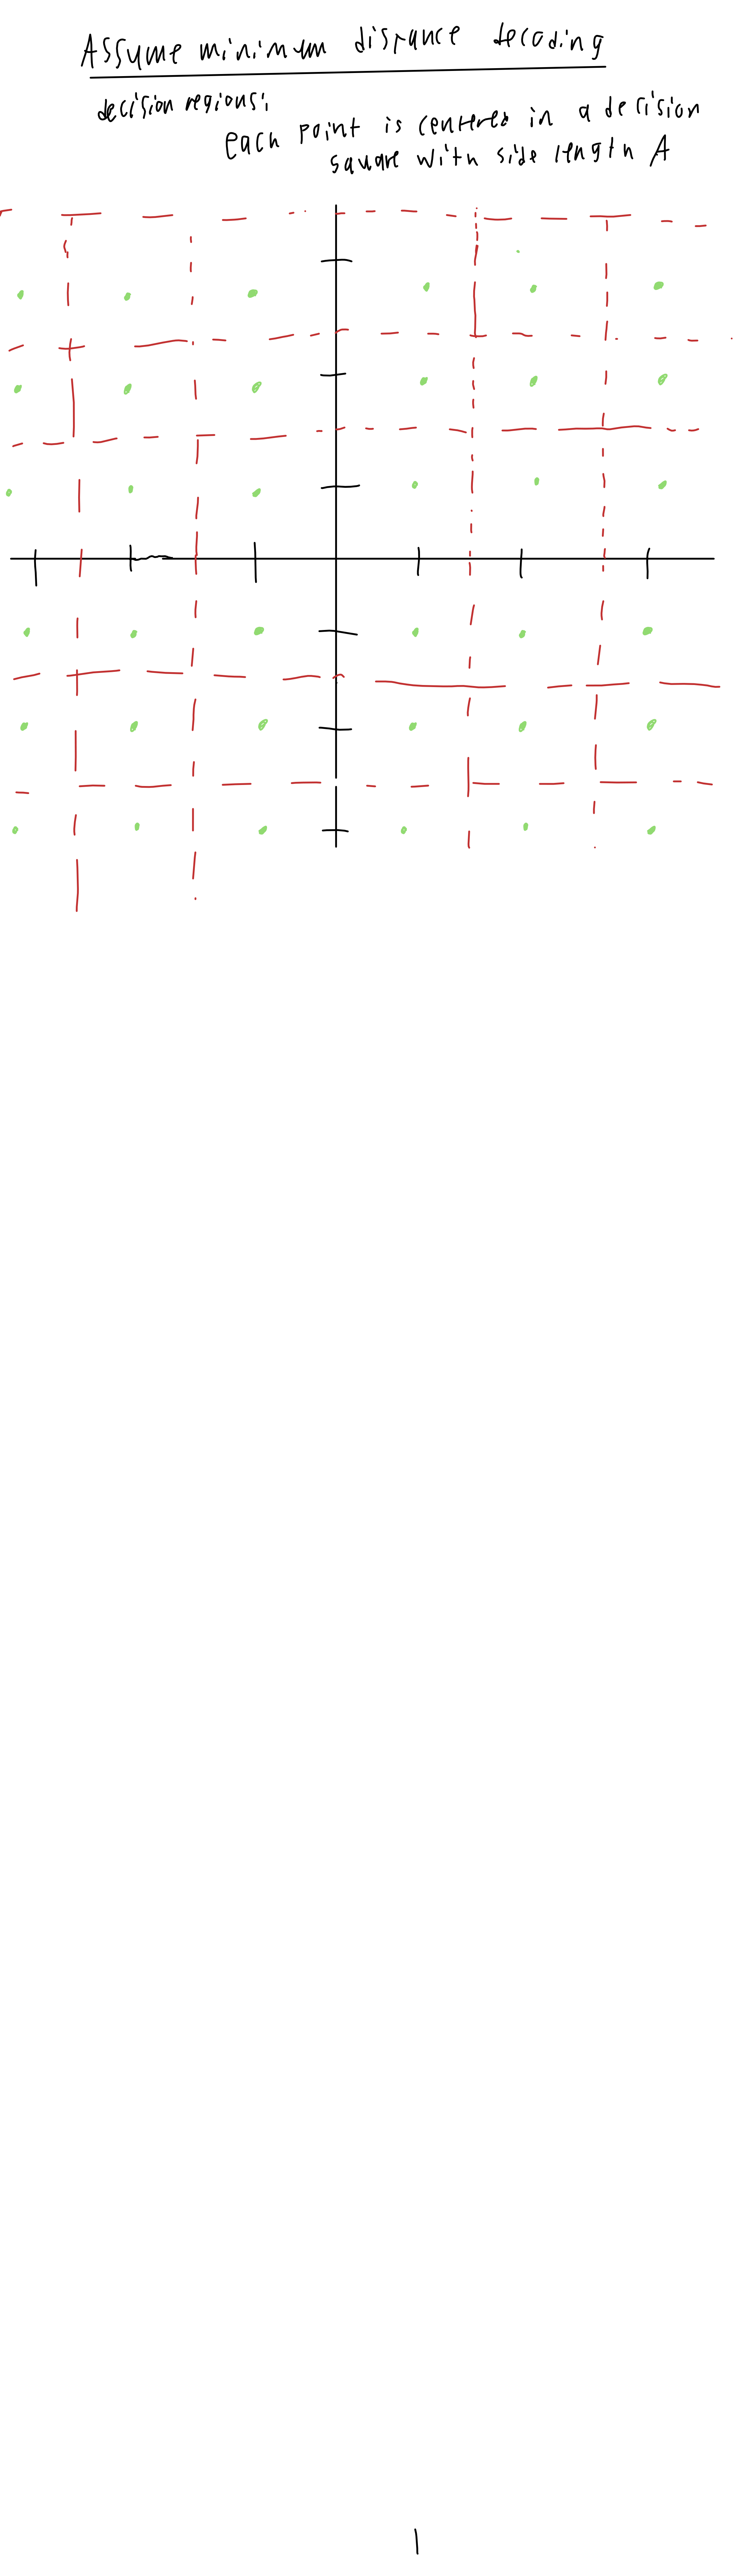

#### Question 4.2c:

Assuming minimum-distance decoding, determine the bit sequence for the matched filter outputs: (-0.30, 0.64), (0.51, -0.49), (-0.90, -0.91), (0.65, 0.07).

*ANSWER:*

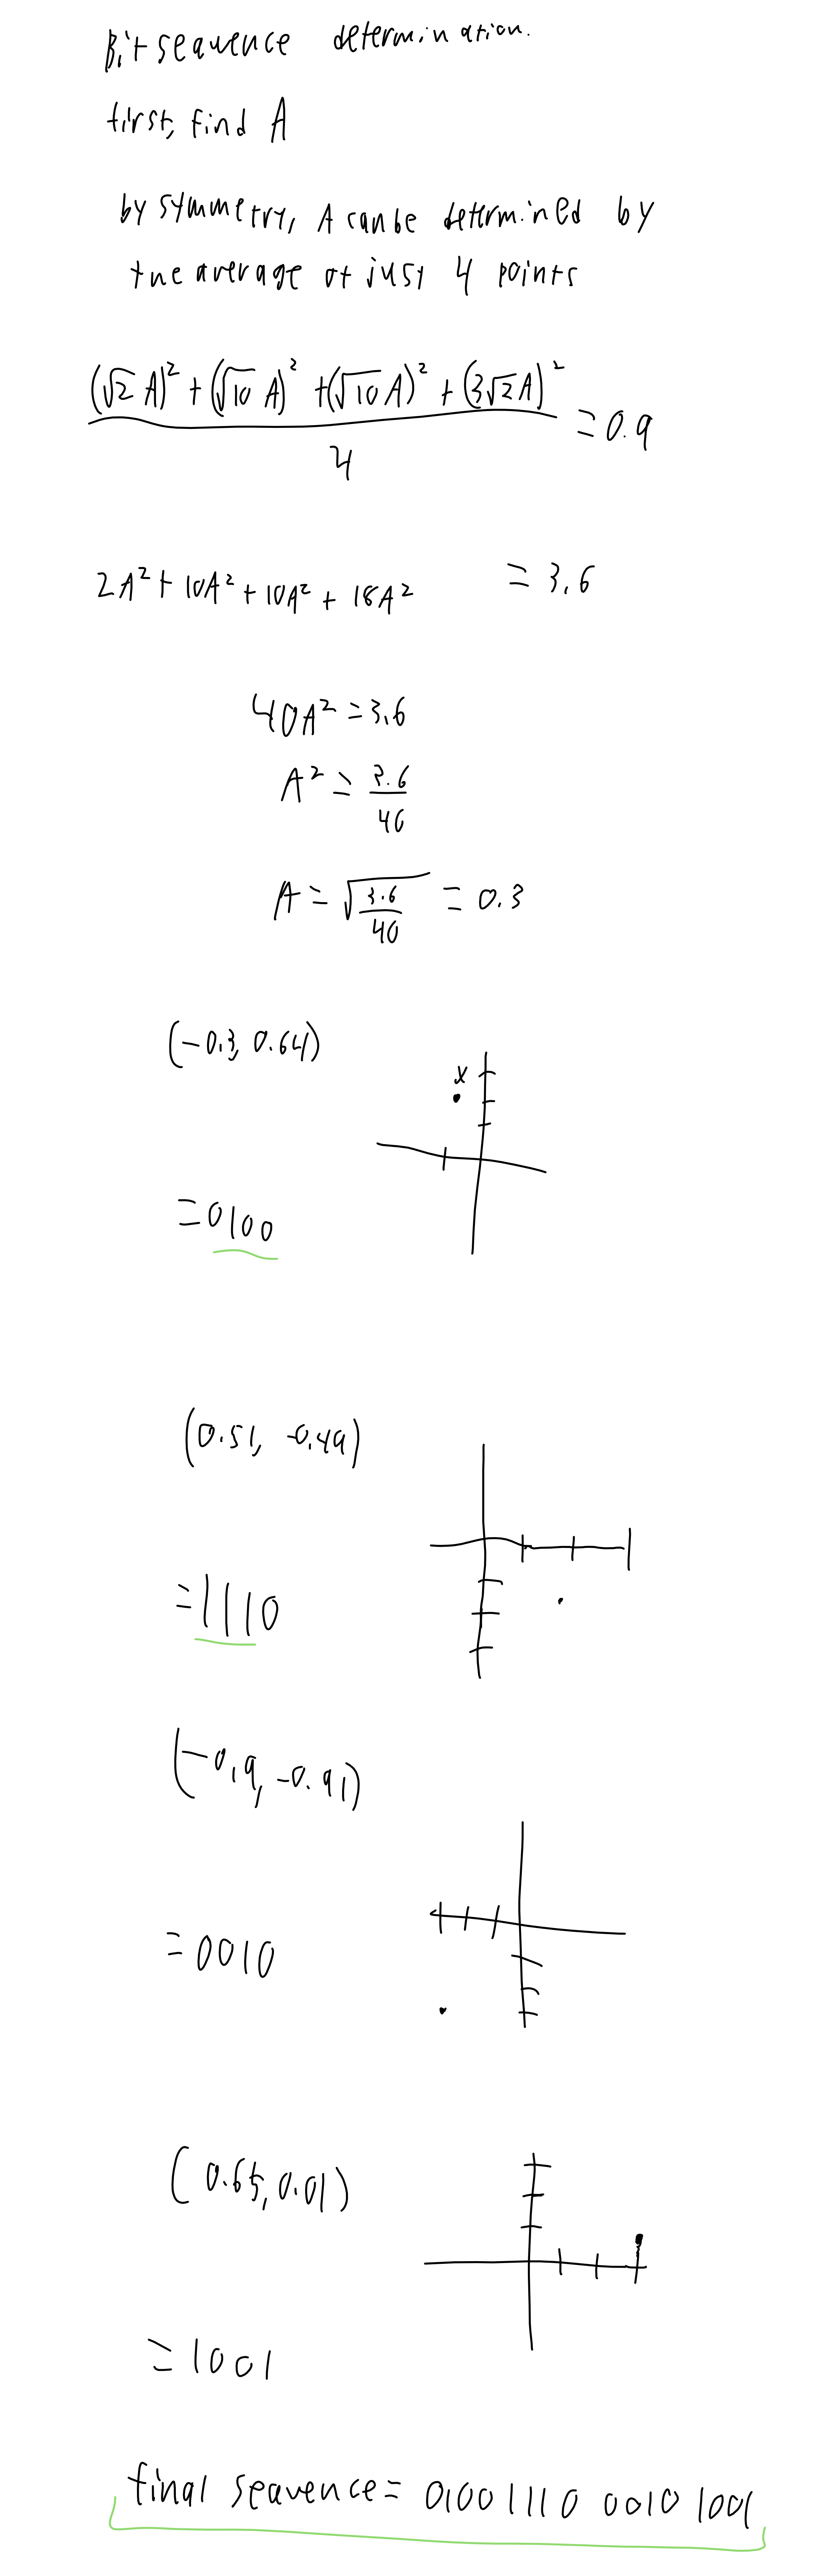


### Exercise 4.3: Pulse Autocorrelation Function

Source: Michael Rice, _Digital Communications: A Discrete-Time Approach_, Second Edition, 2020. 
Problem A.5.

Let $p(t)$ be a real-valued pulse shape and let $P(f) = \int\limits_{-\infty}^\infty p(t) e^{-j 2 \pi f t} dt$ be its Fourier transform. The autocorrelation function of $p(t)$ is
$$r_p(\tau) = \int\limits_{-\infty}^\infty p(t) p(t - \tau) dt,$$
with its Fourier transform being $R_p(f) = \int\limits_{-\infty}^\infty r_p(\tau) e^{-j 2 \pi f \tau} dt$.

Prove that $R_p(f) = |P(f)|^2$.

*ANSWER:*

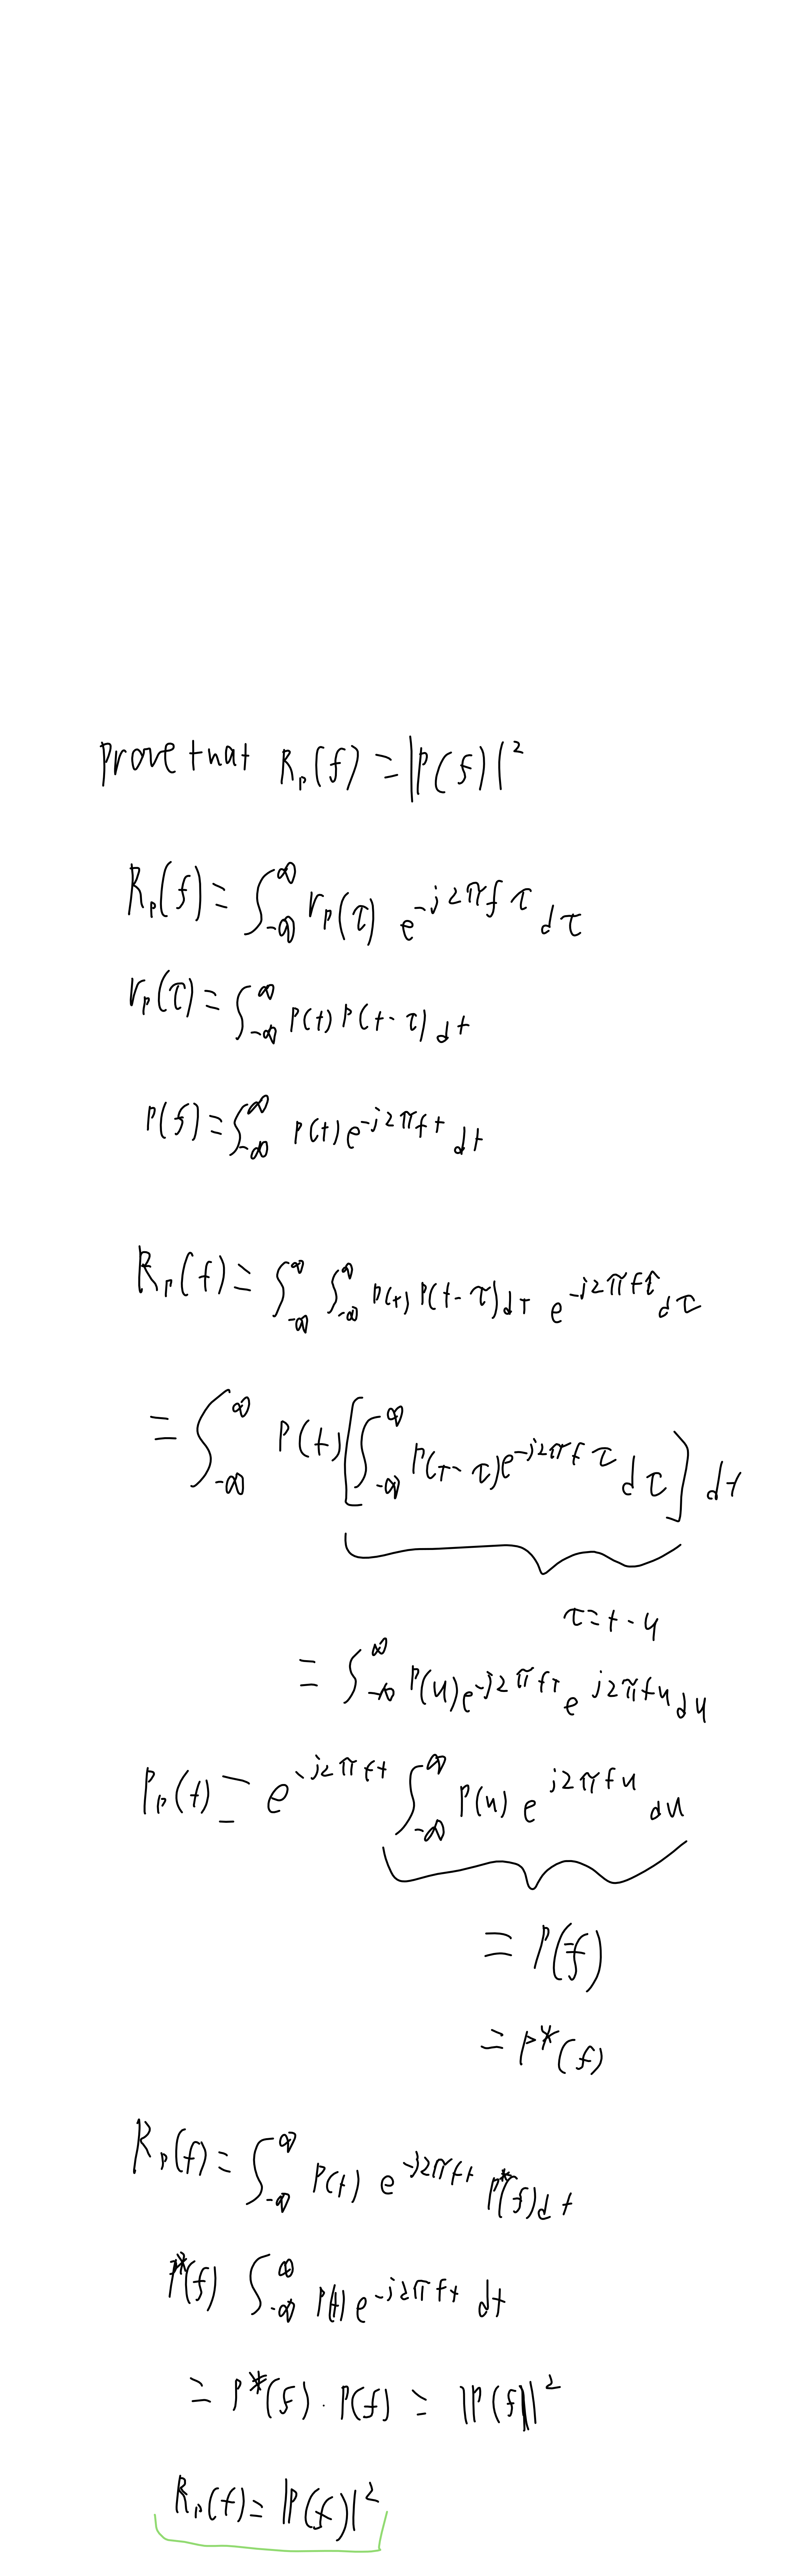

### Exercise 4.4: Triangular Pulse Shape

Source: Michael Rice, _Digital Communications: A Discrete-Time Approach_, Second Edition, 2020. 
Problem A.2.

Consider the triangular pulse shape defined by

\begin{equation*}
p(t) = \left \{
  \begin{array}{lr}
    0 & t \leq 0\\
    2 A t/T_s & 0 \leq t \leq T_s/2\\
    2 A (1 - t/T_s) & T_s/2 \leq t \leq T_s\\
    0 & T_s \leq t
  \end{array}
\right.
\end{equation*}


#### Question 4.4a:

Determine the value of $A$ required for $p(t)$ to be a unit energy pulse shape.

*ANSWER:*

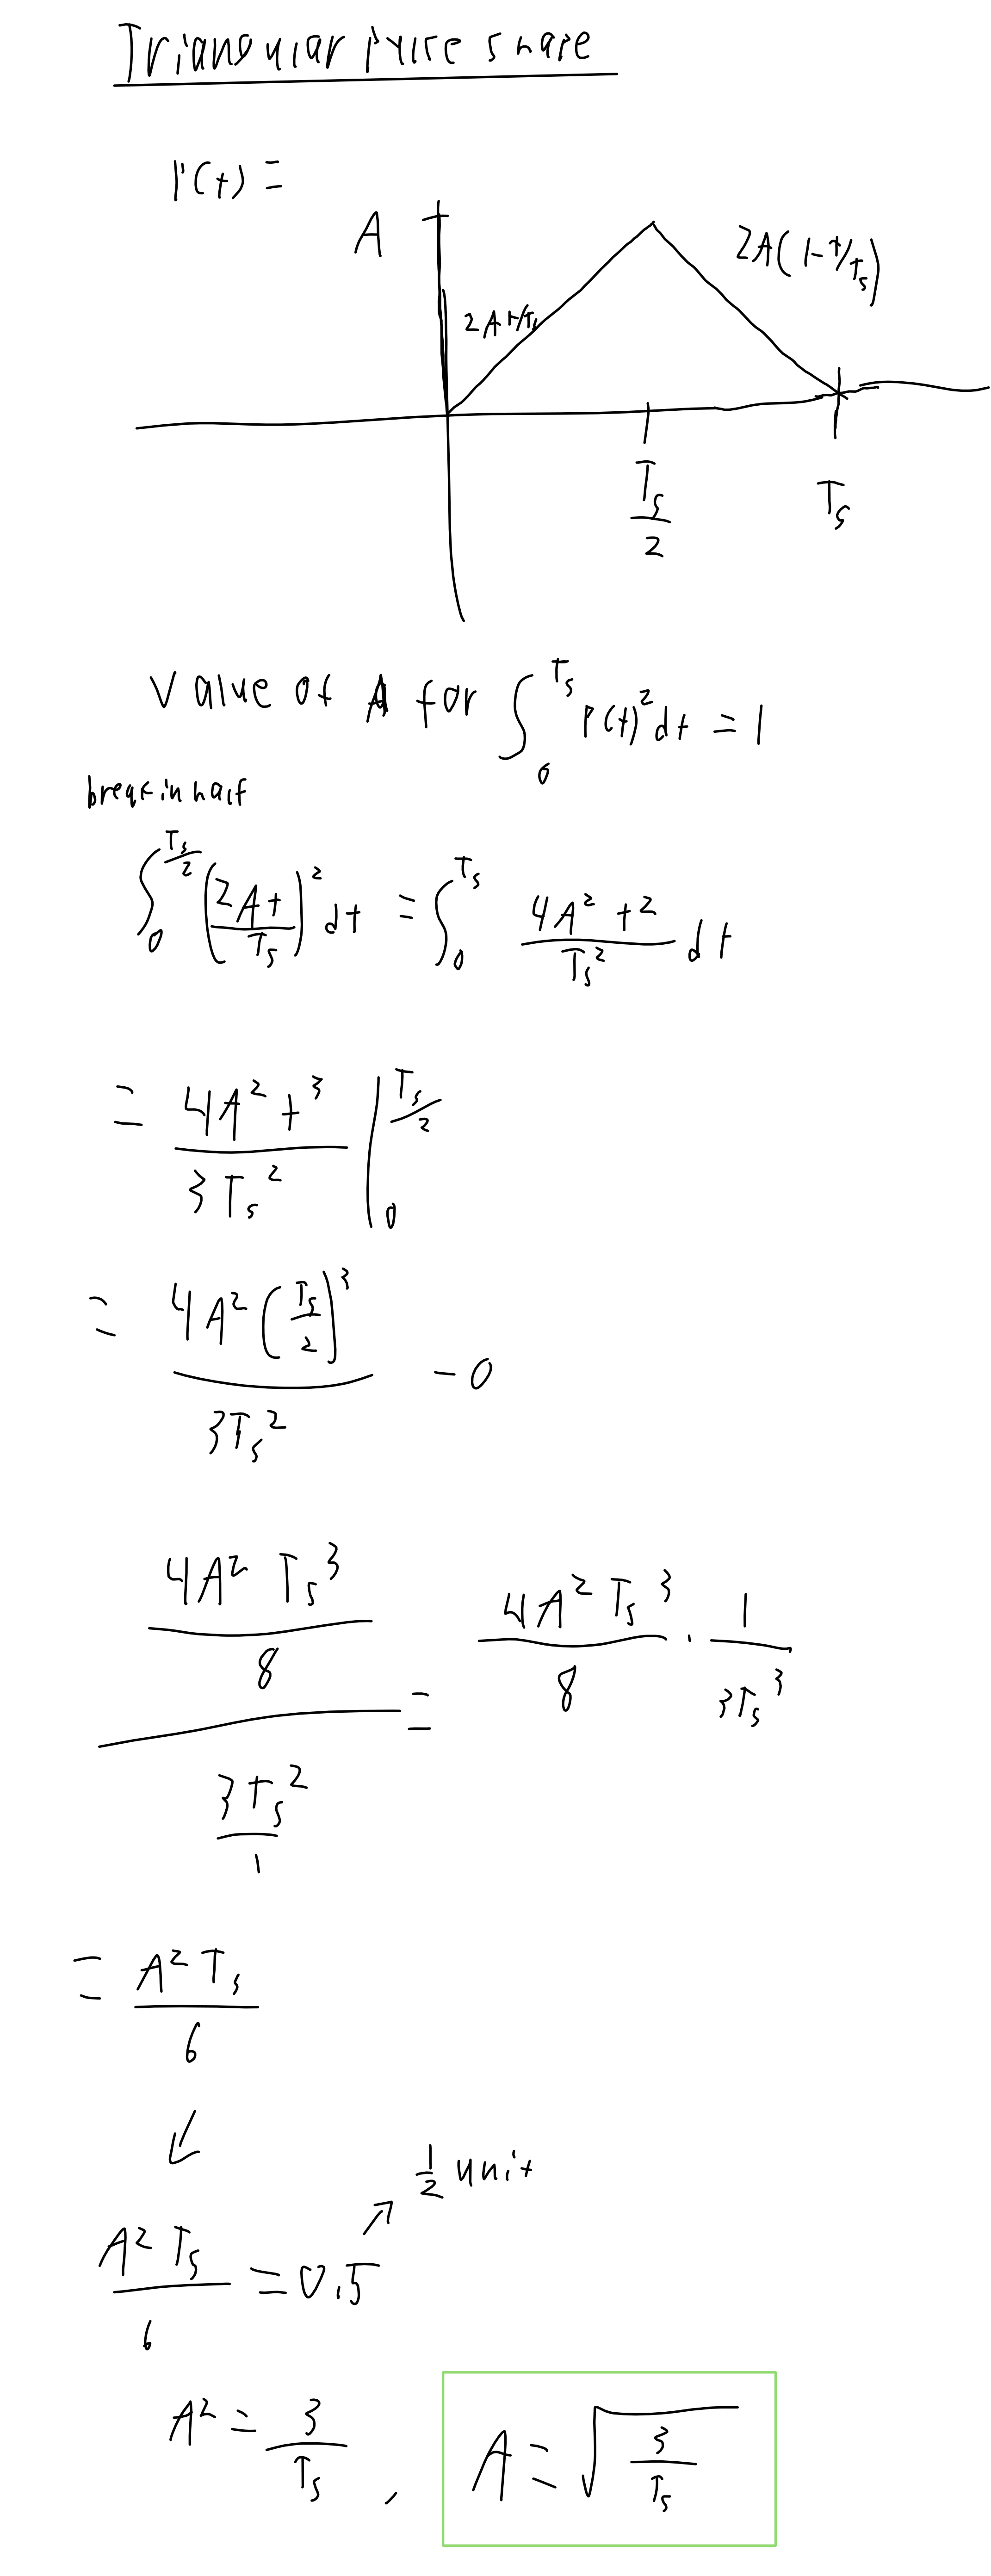

#### Question 4.4b:

Characterize $r_p(\tau) = \int\limits_0^{T_s} p(t) p(t - \tau) dt$.

*ANSWER:*

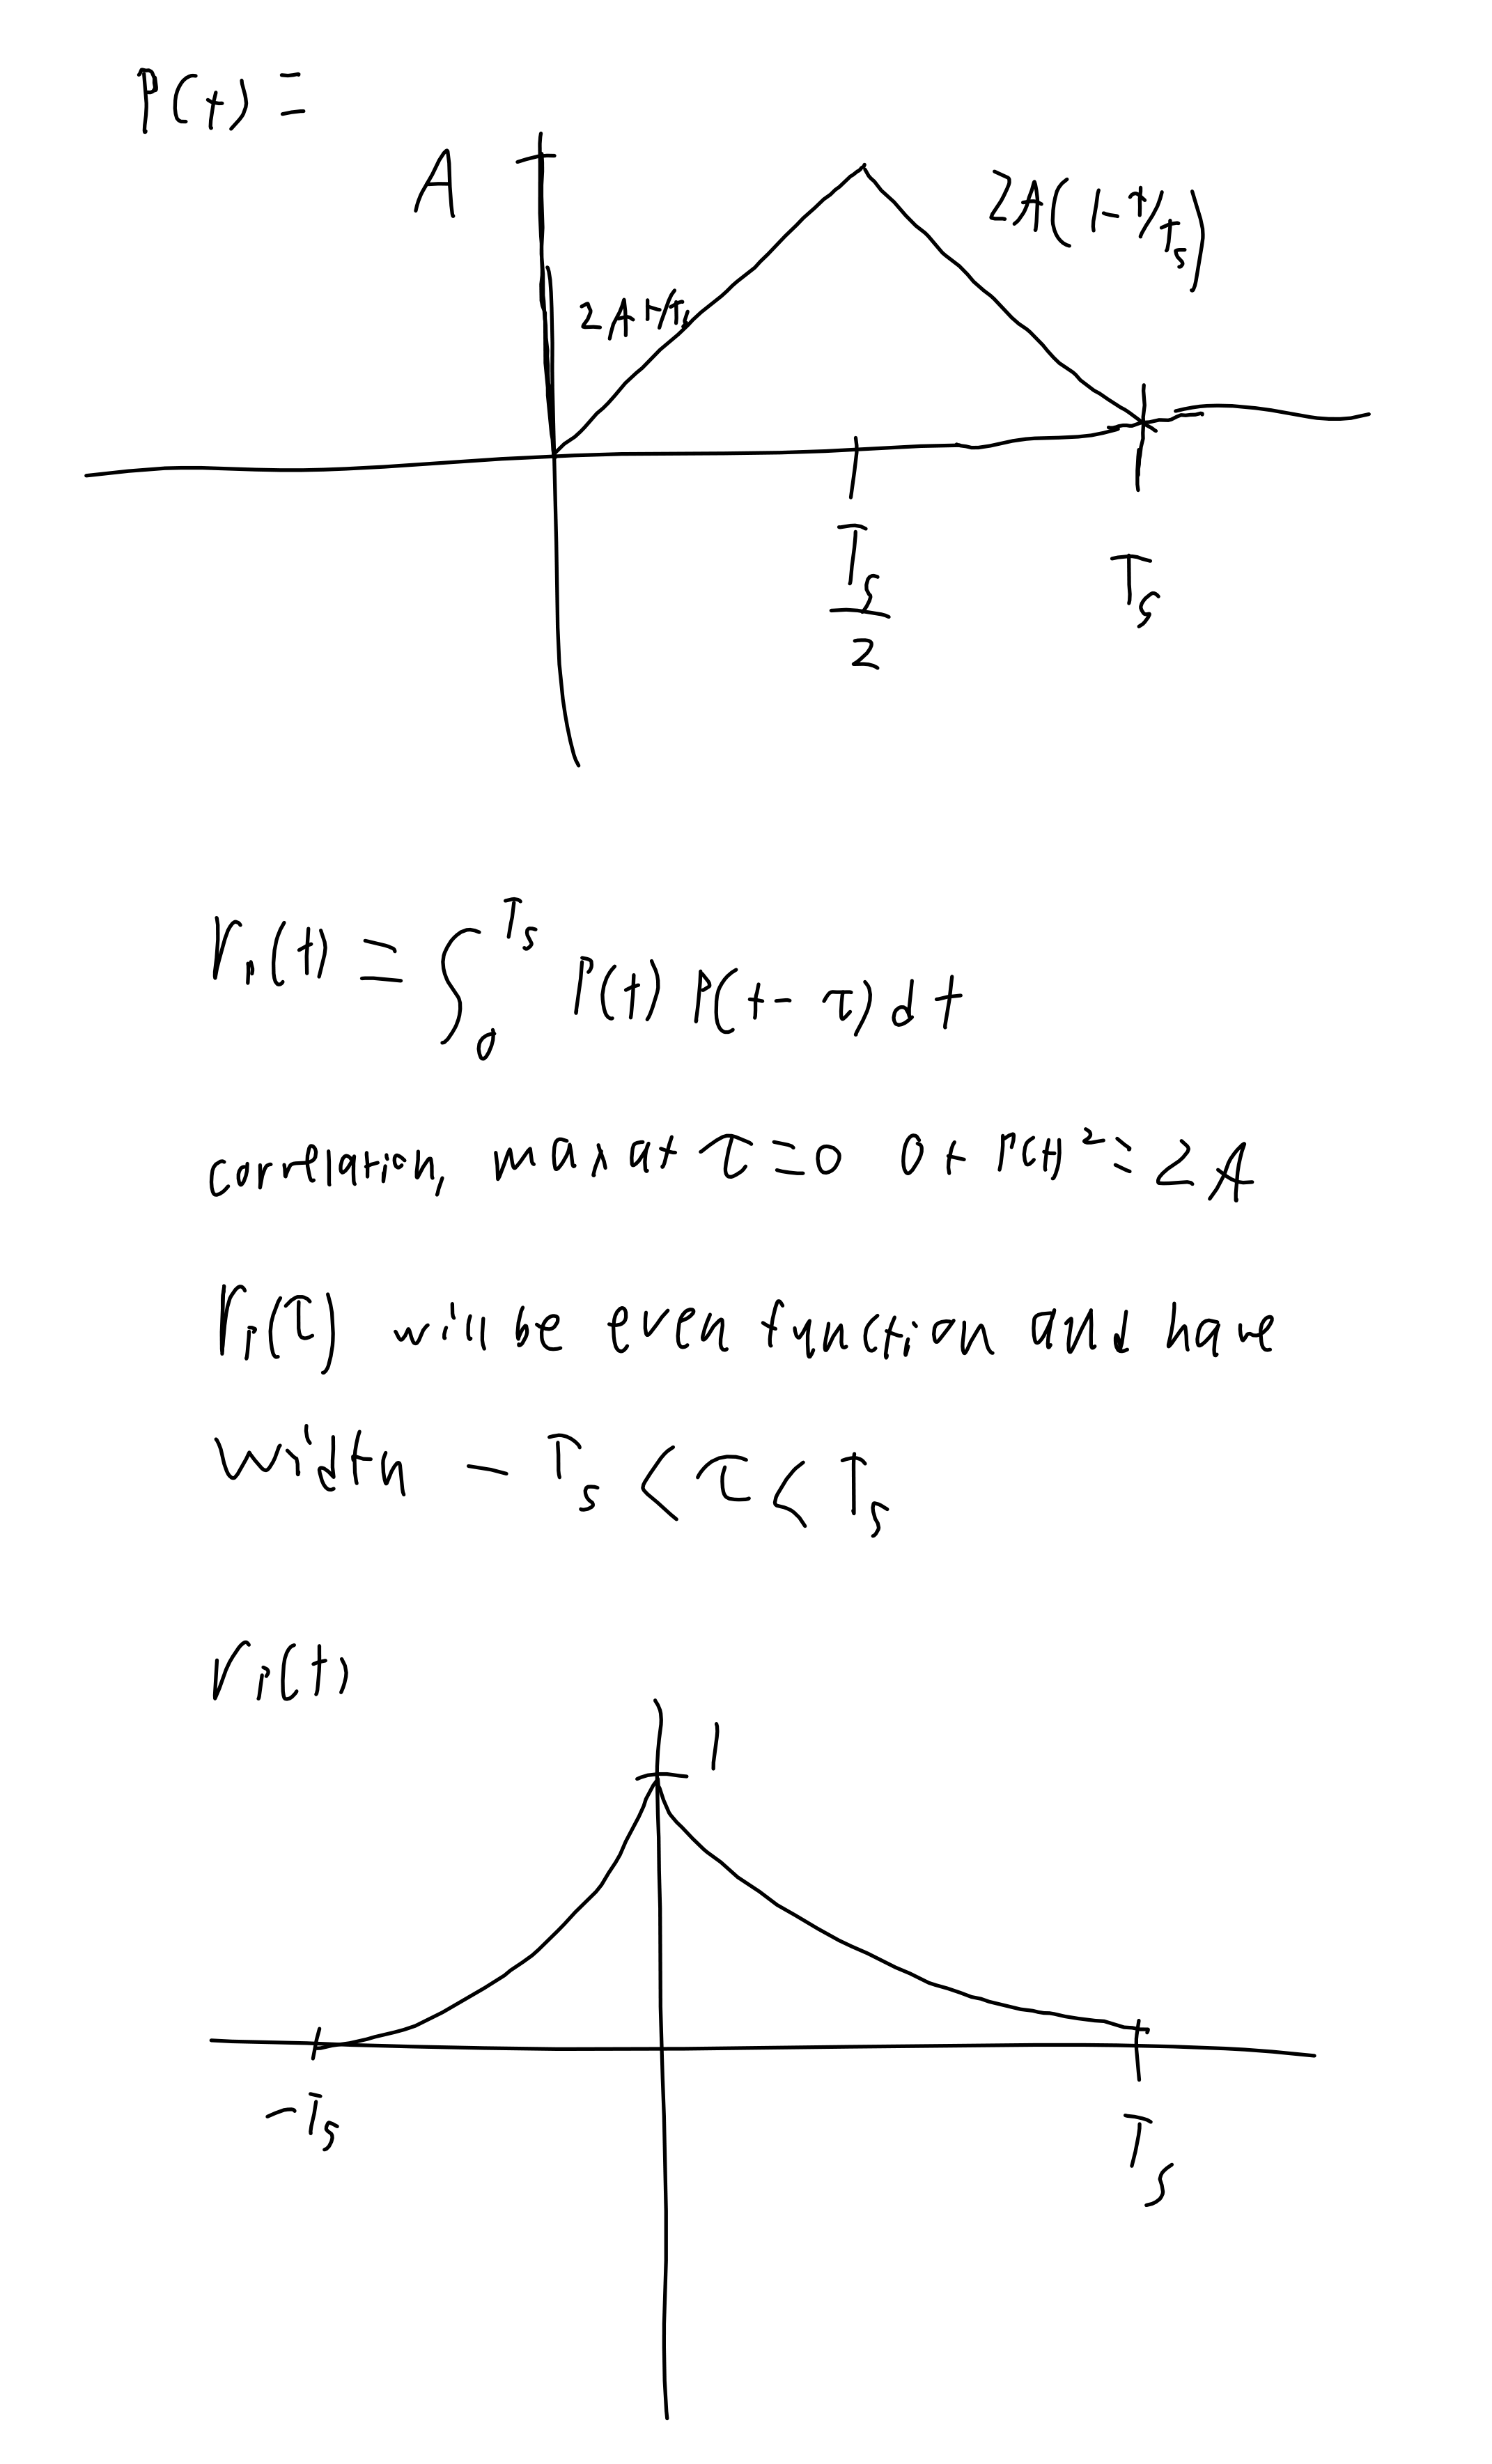

#### Question 4.4c:

Compute $|P(f)|^2$.

*ANSWER:*

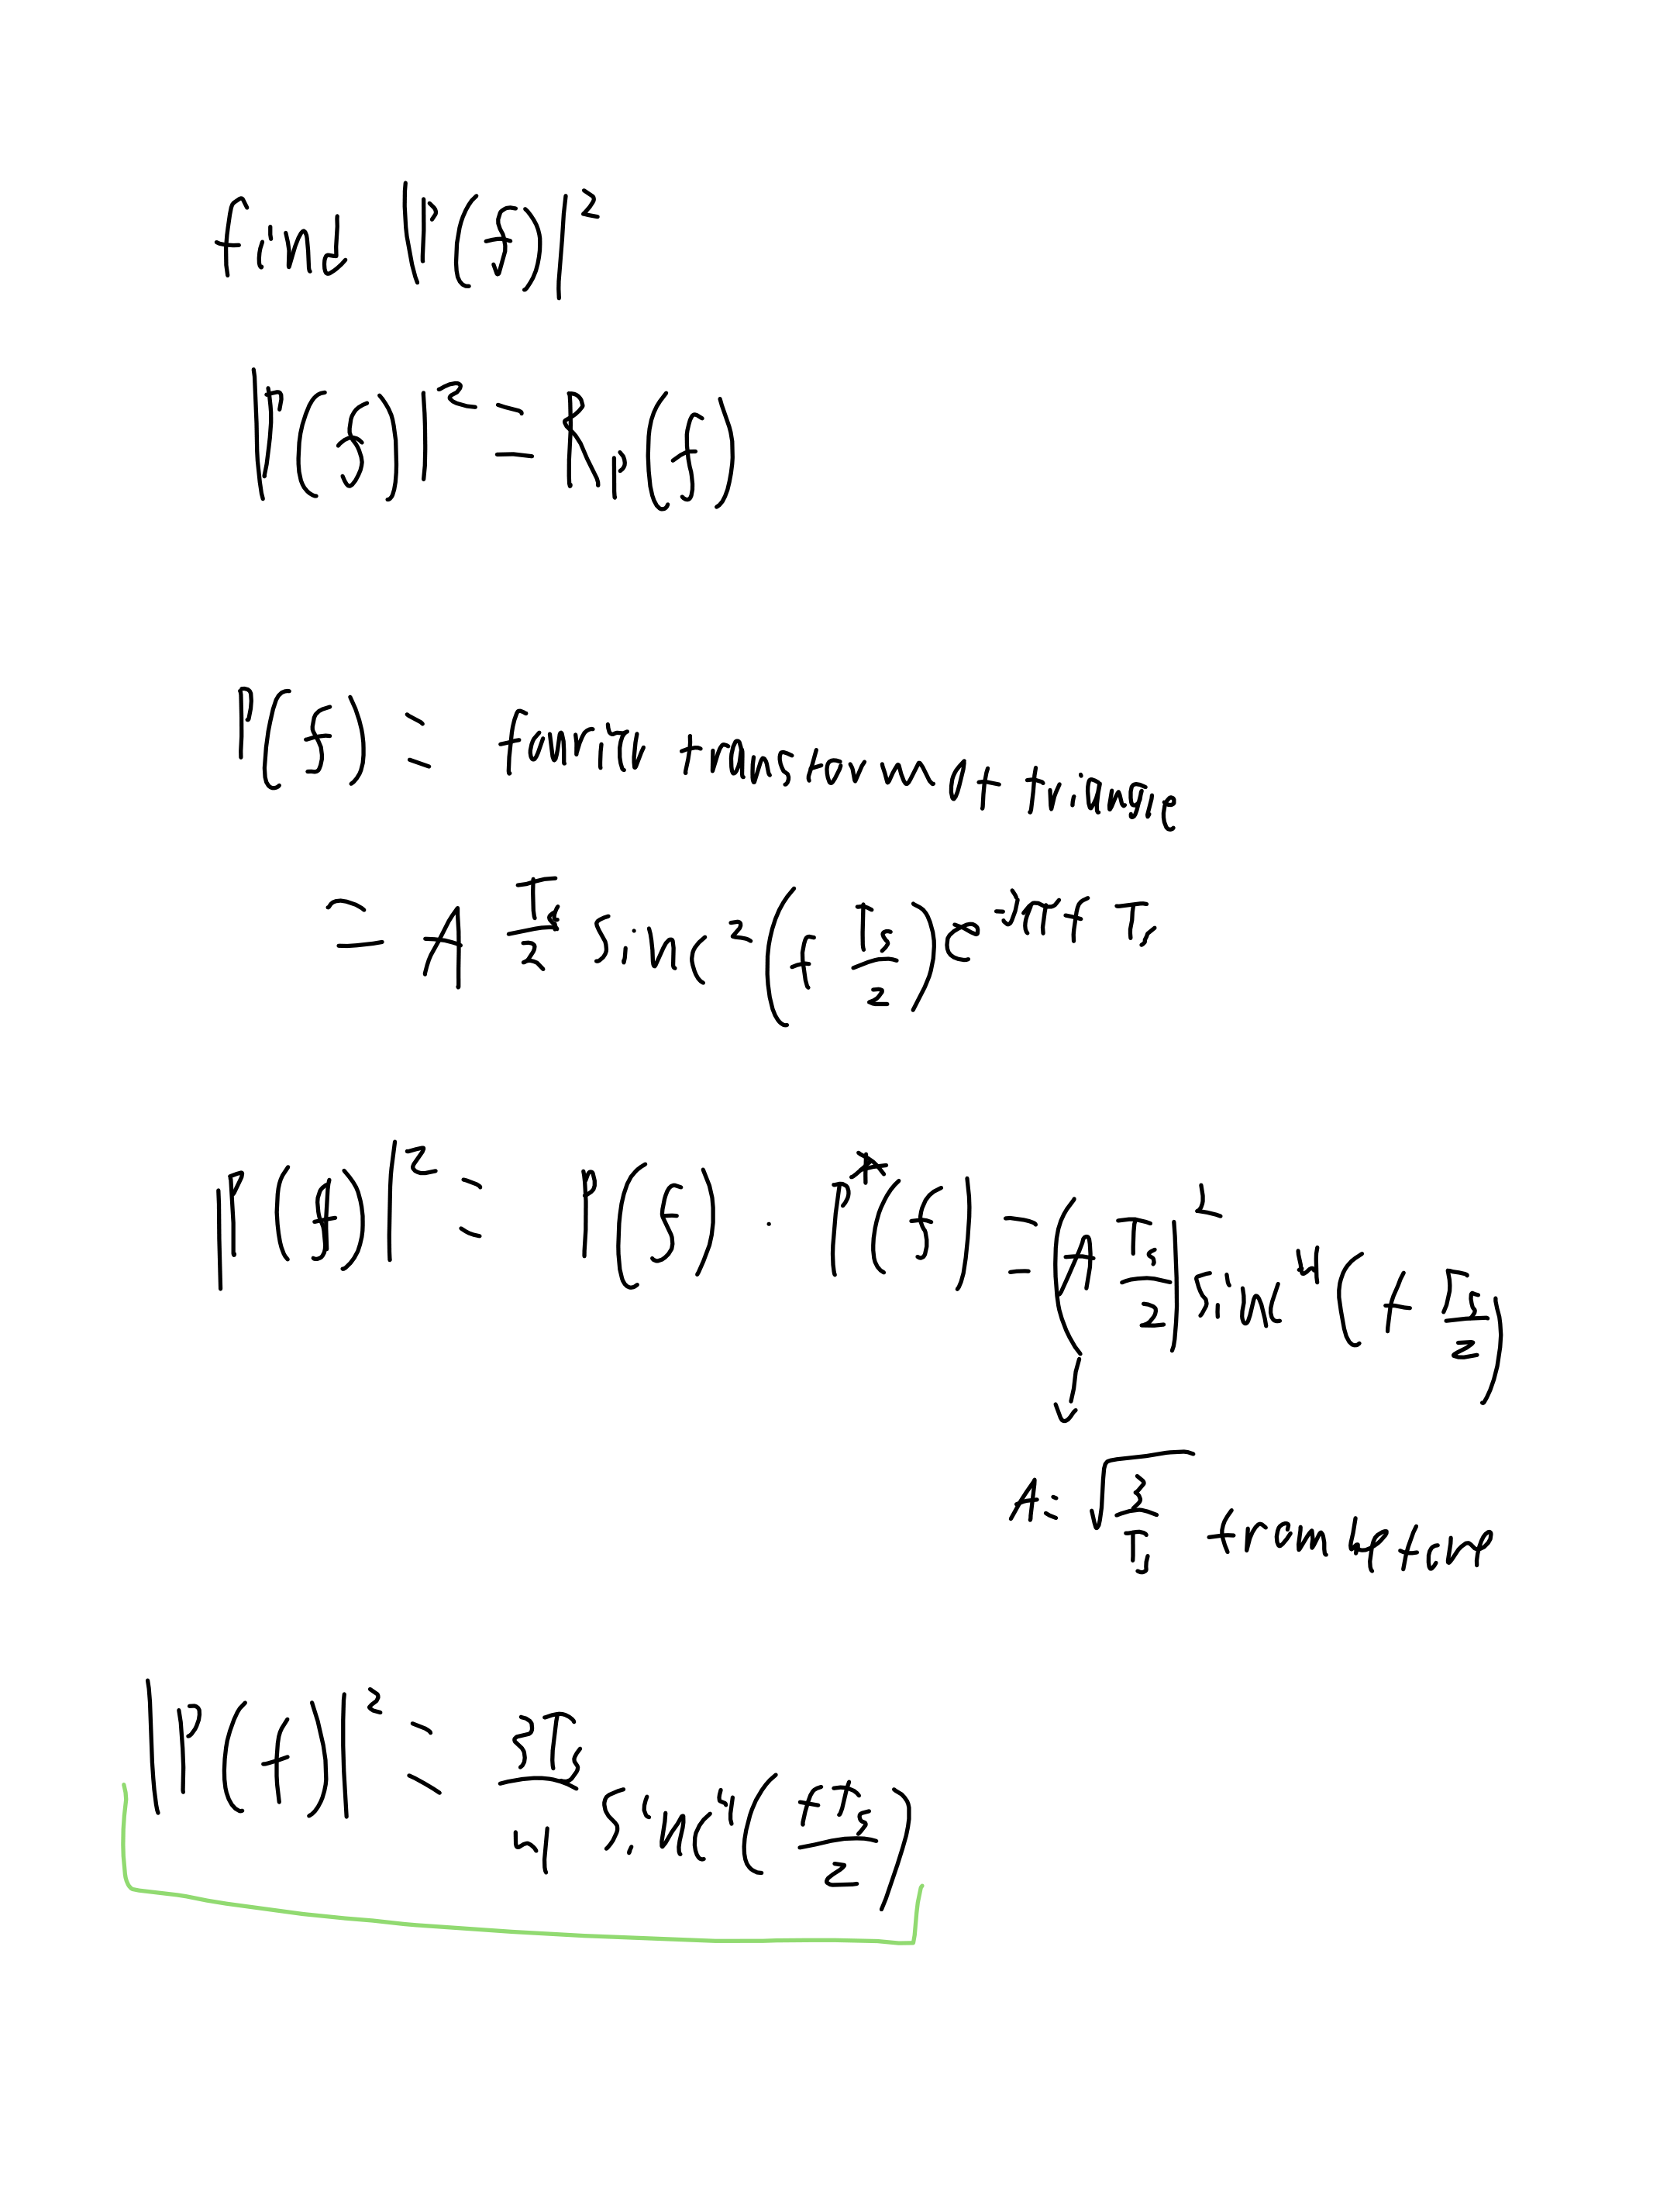

#### Question 4.4d:

Estimate the absolute bandwidth $B_{\mathrm{abs}}$, the $90$\% bandwidth $B_{90}$, the $99$\% bandwidth $B_{99}$, and the bandwidth below which the spectrum is $-60$ dB or lower relative to its peak value $B_{\text{-60 dB}}$. (_Note:_ You will have to use compute most of these numerically.)

*ANSWER:*

$B_{\mathrm{abs}} = \infty$

$B_{90} = 0.849 * 2$

$B_{99} = 1.299 * 2$

$B_{-60dB} = 19.5 * 2$

All values computed by script below:

1.299


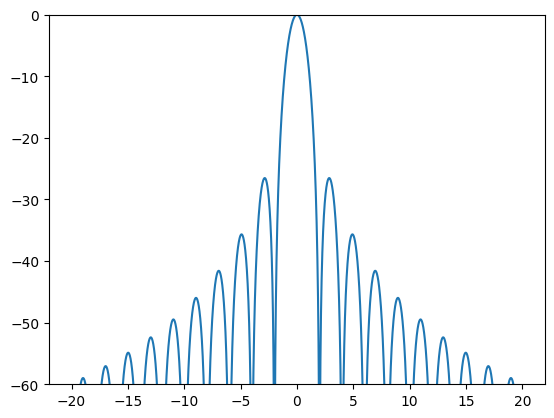

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate


T_s = 1
A = np.sqrt(3/T_s)
f = np.linspace(-20, 20, 10000)

P_f = ((A*T_s)/2) * np.pow(np.sinc(f * (T_s/2)),2)*np.exp(-1j*np.pi*f*T_s)

P_f_p = P_f * np.conj(P_f)

def integrand(f):
    return ((A*T_s)/2) * np.pow(np.sinc(f * (T_s/2)),2) * ((A*T_s)/2) * np.pow(np.sinc(f * (T_s/2)),2)

#compute integral
width = 5
slices = 1e4
target_percent = 0.99

outarr = [scipy.integrate.quad(integrand, -lim * width/slices, lim * width/slices)[0] for lim in range(int(slices+1))]

freqs = [lim*width/slices for lim in range(int(slices+1))]

diff = [abs(val - target_percent) for val in outarr]

# print frequency width for percentage in diff
print(freqs[np.argmin(diff)])

#plot to estimate 60db line
P_f_db = (10 * np.log10(np.real(P_f_p)/np.max(P_f_p)))

plt.plot(f, P_f_db)
plt.ylim((-60, 0))
plt.show()

### Exercise 4.5: Phasor Representation for Quadrature Multiplexing

Source: Michael Rice, _Digital Communications: A Discrete-Time Approach_, Second Edition, 2020. 
Problem B.16.

The *phasor* associated with $A \cos(\omega_0 t + \theta)$ is $A e^{j \theta}$. The phasor concept results from writing $A \cos(\omega_0 t + \theta)$ as $\text{Re}\{A e^{j (\omega_0 t + \theta)}\} = \text{Re}\{A e^{j \theta} e^{j \omega_0 t}\}$. The term $e^{j \omega_0 t}$ is called the *rotational operator* and the term $e^{j \theta}$ is called the *phase operator*. When the phase operator is coupled with the magnitude $A$, the resulting phasor is $A e^{j \theta}$.

In a linear time-invariant system, no new frequencies are produced, so the rotational operator can be dropped and all analysis can be performed using manipulations on the phase operator. The same concept can be applied to a QAM signal, which can be expressed in the form
\begin{equation*}
    I(t) \cos(\omega_0 t) - Q(t) \sin(\omega_0 t) = A(t) \cos(\omega_0 t + \theta(t))
\end{equation*}
whose corresponding phasor will be $A(t) e^{j \theta(t)}$.

Determine expressions for $A(t)$ and $\theta(t)$ in the terms of $I(t)$ and $Q(t)$.

*ANSWER:*

$A(t) = \sqrt{I(t)^2 + Q(t)^2}$

$\theta(t) = \tan^{-1}(\frac{Q(t)}{I(t)})$

### Exercise 4.6: Pulse Phase Modulation Code

In this exercise, we will study and implement a simple quadrature phase-shift keying (QPSK) modulator in Python code. For QPSK signaling in each symbol period of length $T_s$ seconds, the waveform can be one of four possibilities based upon the two input bits
$$\sqrt{\frac{2E_s}{T_s}}\cos\left(2\pi f_c t + (2n-1)\frac{\pi}{4}\right), \quad n=1,2,3,4,$$
where $E_s$ is the average energy of a symbol and $f_c$ is the carrier frequency.

#### Question 4.6a:

Show that an equivalent specification of the QPSK waveform is that, in each symbol interval of length $T_s$ seconds, the four possible waveforms are:
$$\pm \sqrt{\frac{E_s}{2T_s}}\cos(2\pi f_c t) \pm \sqrt{\frac{E_s}{2T_s}}\sin(2\pi f_c t)$$
Associate the appropriate value of $n=1,2,3,4$ with each of these waveforms.

*ANSWER:*

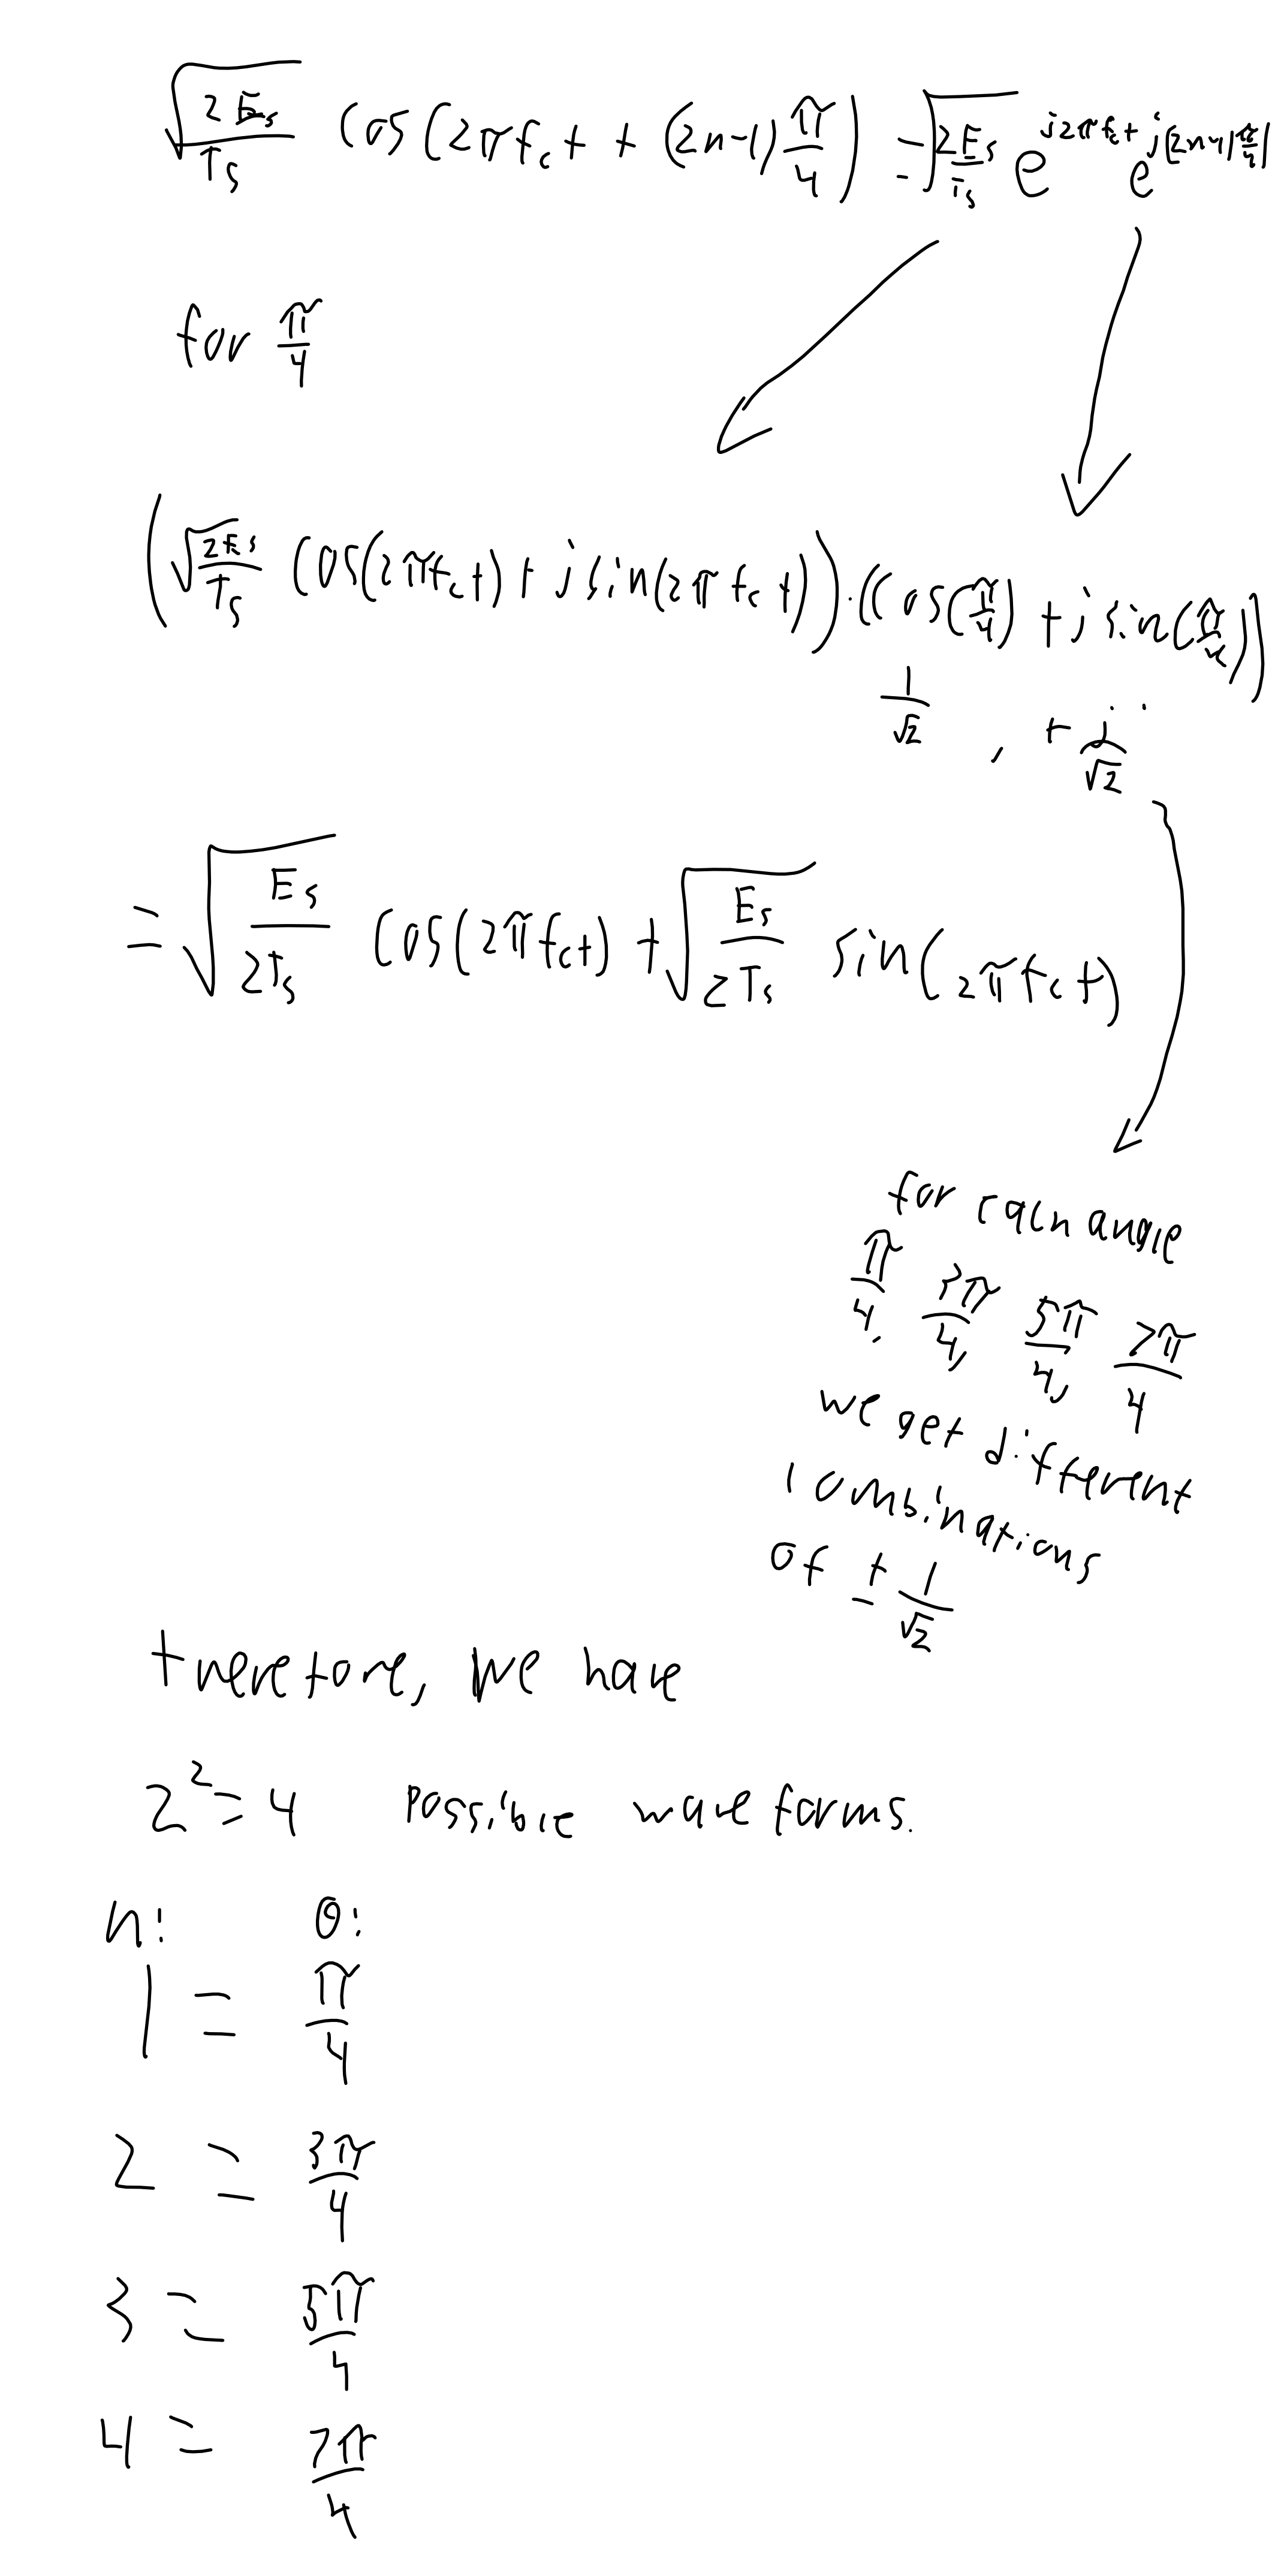

#### Question 4.6b:

Suppose the the desired symbol mapping for QPSK is shown in the figure below.

![QPSK Constellation Diagram with Gray Mapping](Images/qpsk_const.png)

If the input bits are denoted by the pair $b_0b_1$, specify the mapping between pairs of input bits and the output phase
specified by $n=1,2,3,4$.

*ANSWER:*

$$n=\begin{cases}
1 & b_0b_1 = 11\\
2 & b_0b_1 = 01\\
3 & b_0b_1 = 00\\
4 & b_0b_1 = 10
\end{cases}$$




#### Question 4.6.c:

Write a Python function that implements QPSK modulation using the insights and simplifications above.

In [15]:
def qpsk_mod(bits,E_s,T_s,f_c,f_s):

# bits - array of binary digits
# E_s - energy per symbol
# T_s - symbol interval
# f_c - carrier frequency
# f_s - sampling frequency

# insert generation code here
    #generate bits
    I_Bits = bits[::2]
    Q_Bits = bits[1::2]
    num_symbols = len(I_Bits)

    #generate symbols
    I_symbols = np.sqrt(E_s/(2*T_s)) * (I_Bits * 2 - 1)
    Q_symbols = np.sqrt(E_s/(2*T_s)) * (Q_Bits * 2 - 1)

    #generate waveforms
    t_symbol = np.arange(0, T_s, 1/f_s)
    x = np.array([])

    for i in range(num_symbols):
        I_part = I_symbols[i] * np.cos(2 * np.pi * f_c * t_symbol)
        Q_part = Q_symbols[i] * np.sin(2 * np.pi * f_c * t_symbol)
        
        symbol_waveform = I_part - Q_part
        x = np.concatenate((x, symbol_waveform))
        
    return x

#### Question 4.6d:

Generate a plot of a QPSK modulated waveform for $10$ random bits. Set the value of the symbol duration as $T_s=10^{-3}$ sec, of the average energy per symbol as $E_s=1$ J, of the carrier frequency $f_c = 5000$ Hz, and of the sampling frequency as $f_s = 10^5$ Hz.

_Note:_ You can generate bits randomly using the [numpy.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) function.

Text(0.5, 1.0, 'Continuous-Time QPSK Waveform')

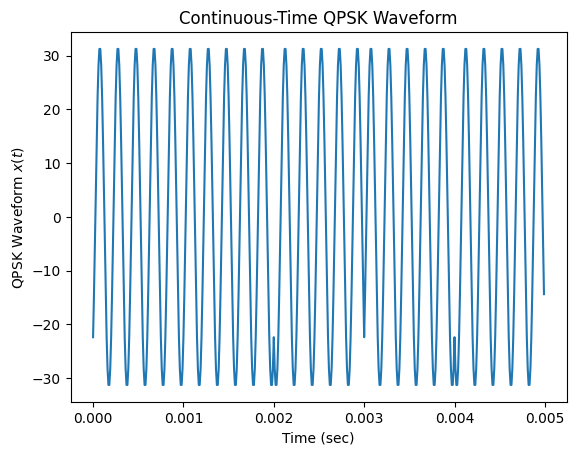

In [16]:
import numpy as np
import matplotlib.pyplot as plt
K = 10
E_s = 1
T_s = 1e-3
f_c = 5e3
f_s = 1e5

bits = np.random.randint(0,2,K)

x = qpsk_mod(bits,E_s,T_s,f_c,f_s)
t = np.arange(len(x)) / f_s


plt.figure
plt.plot(t, x)
plt.xlabel('Time (sec)')
plt.ylabel('QPSK Waveform $x(t)$')
plt.title('Continuous-Time QPSK Waveform')